In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


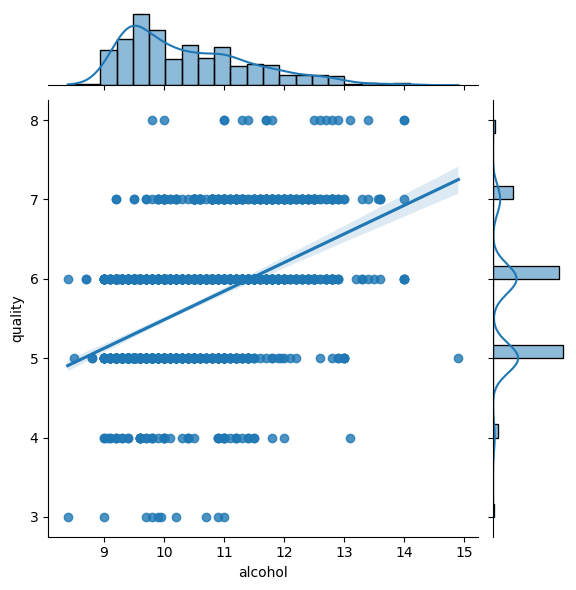

In [38]:
sns.jointplot(x = 'alcohol',y = 'quality',data = df,kind = 'reg')

In [6]:
y = df['quality']

In [13]:
df1 = df.drop('quality',axis = 1)

In [14]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
X = df1

In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [19]:
lr = LinearRegression()

In [20]:
model = lr.fit(X_train,y_train)

In [22]:
model.coef_

array([ 2.30853339e-02, -1.00130443e+00, -1.40821461e-01,  6.56431104e-03,
       -1.80650315e+00,  5.62733439e-03, -3.64444893e-03, -1.03515936e+01,
       -3.93687732e-01,  8.41171623e-01,  2.81889567e-01])

In [23]:
model.intercept_

np.float64(14.355105195761833)

In [24]:
y_pred = model.predict(X_test)

In [28]:
new_datas = [6,0.800,0.05,2,0.076,20,50,0.99453,3.1,0.60,10]
new_datas_df = pd.DataFrame([new_datas],columns = ['fixed acidity',	'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])

In [30]:
model.predict(new_datas_df)

array([5.29988751])

In [31]:
y_pred

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032,
       6.13959677, 5.23386892, 5.54991474, 5.25825299, 5.44810502,
       6.46828999, 5.15018088, 5.59105157, 6.5560658 , 5.32255751,
       5.3918385 , 5.19610791, 5.94475739, 6.36197631, 5.35484893,
       5.41907575, 6.36483321, 5.35121573, 5.172392  , 6.16987311,
       5.25263058, 5.50657406, 5.75422105, 5.39101712, 5.45331031,
       5.02757499, 6.16173243, 5.68661555, 5.6486077 , 6.165471  ,
       5.52872593, 5.24414488, 6.17724727, 5.16500868, 5.87598332,
       5.81317121, 6.41982782, 5.6059474 , 5.15232137, 5.55634632,
       5.16044852, 5.10449459, 5.58371721, 6.33425313, 4.95134985,
       4.98364804, 6.01041999, 5.40809804, 5.83802638, 5.2486897 ,
       5.60717482, 5.96630957, 5.27619063, 5.30380113, 6.4949309 ,
       5.42033967, 6.34273471, 5.24618531, 6.41317317, 5.31237924,
       6.41746963, 4.74315748, 5.79362039, 5.8283184 , 6.17598

In [34]:
cross_val_score(model,X_train,y_train,cv= 10,scoring = "neg_mean_squared_error")

array([-0.39158054, -0.51354046, -0.47883933, -0.4912904 , -0.46152392,
       -0.45394686, -0.44549394, -0.46091861, -0.24596434, -0.42026844])

In [36]:
rmse = np.sqrt(np.mean(-cross_val_score(model,X_train,y_train,cv= 10,scoring = "neg_mean_squared_error")))
rmse

np.float64(0.6605578586811213)

In [37]:
np.sqrt(np.mean(-cross_val_score(model,X,y,cv= 10,scoring = "neg_mean_squared_error")))


np.float64(0.6596854584043005)

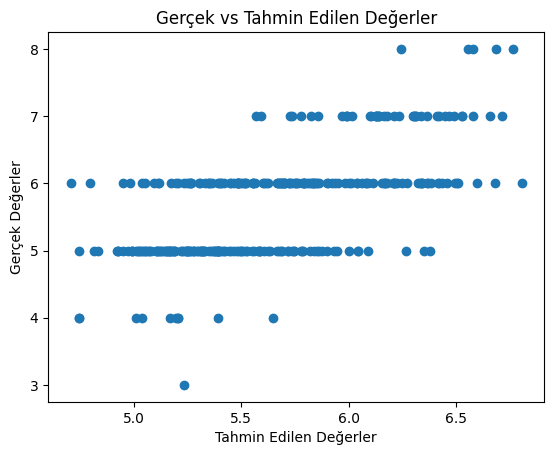

In [40]:
plt.scatter(y_pred, y_test)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.show()

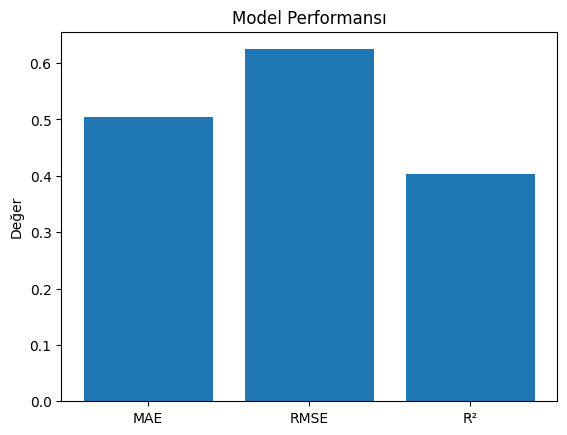

In [49]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Performans metriklerini görselleştirme
metrics = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

plt.bar(metrics.keys(), metrics.values())
plt.title('Model Performansı')
plt.ylabel('Değer')
plt.show()